In [1]:
# 数値計算ライブラリと描画ライブラリのインポート
# グラフをこのページに表示させるための設定
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 問題
外見上はまったく区別がつかない 6 種の設定のスロット ω0, ω1, ω2, ω3, ω4, ω5 が大量に設置されており，その台数比率はそれぞれ，π0, π1, π2, π3, π4, π5 とする．また，これら 6 種のスロットを回して当たりの出る確率はそれぞれ，θ_x1_0, θ_x1_1, ...，スイカの出る確率はそれぞれ，θ_x2_0, θ_x2_1, ...，チェリーの出る確率はそれぞれ，θ_x3_0, θ_x3_1， ... とする．この中からスロットを無作為に 1 台選び，そのスロットを続けて n(≧2) 回遊んだところ，当たりの観測結果 x1_0 x1_1 ...，スイカの観測結果 x2_0 x2_1 ...，チェリーの観測結果 x3_0 x3_1 ... が得られたとする．この結果より，そのスロットの設定が ω0, ω1, ω2, ω3, ω4, ω5 である確率をそれぞれ求めよ．

In [2]:
pi = np.array([0.25 , 0.20, 0.20, 0.15 , 0.15, 0.05])  # 台数比率
# pi = np.ones(6)/6  # 台数比率
th_x1 = np.array([1/668.7, 1/528.5, 1/496.4, 1/409.6, 1/390.0, 1/334.3])  # 当たり確率
th_x2 = np.array([1/431.2, 1/364.1, 1/341.3, 1/292.6, 1/277.7, 1/240.9])  # スイカ確率
th_x3 = np.array([1/6.35, 1/6.29, 1/6.25, 1/6.23, 1/6.18, 1/6.07])  # チェリー確率
n = 2500  # 遊んだ回数

config = 5  # 正解の設定(0~5)
num_x1 = int(n * th_x1[config])  # 当たり回数
num_x2 = int(n * th_x2[config])  # スイカ回数
num_x3 = int(n * th_x3[config])  # チェリー回数
print('num_x1:', num_x1)
print('num_x2:', num_x2)
print('num_x3:', num_x3)

num_x1: 7
num_x2: 10
num_x3: 411


In [3]:
x1 = np.zeros(n)
x2 = np.zeros(n)
x3 = np.zeros(n)
x1[:num_x1] = 1  # 当たり数を設定（1: 当たり，0: はずれ）
x2[:num_x2] = 1  # スイカ数を設定（1: 当たり，0: はずれ）
x3[:num_x3] = 1  # チェリー数を設定（1: 当たり，0: はずれ）
np.random.shuffle(x1)  # 順番ランダムに
np.random.shuffle(x2)  # 順番ランダムに
np.random.shuffle(x3)  # 順番ランダムに

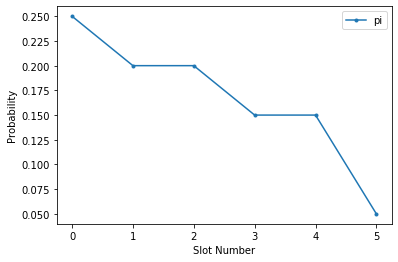

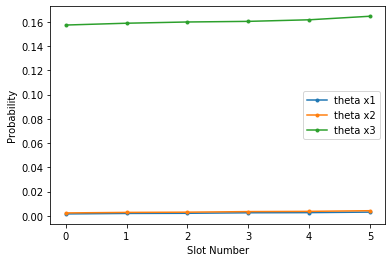

In [4]:
plt.plot(pi, '.-', label='pi')
plt.xlabel('Slot Number')
plt.ylabel('Probability')  # 台数比率（予想）
plt.legend()
plt.show()

plt.plot(th_x1, '.-', label='theta x1')
plt.plot(th_x2, '.-', label='theta x2')
plt.plot(th_x3, '.-', label='theta x3')
plt.xlabel('Slot Number')
plt.ylabel('Probability')  # 当たり確率（ネット情報）
plt.legend()
plt.show()

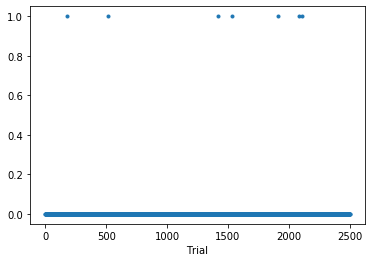

In [5]:
# 当たり=1, はずれ=0
plt.plot(x1, '.')
plt.xlabel('Trial')
plt.show()

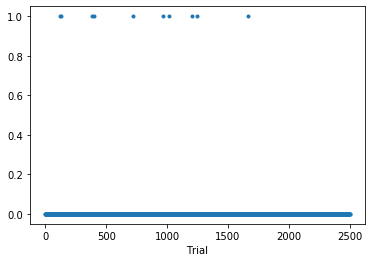

In [6]:
# スイカ=1, はずれ=0
plt.plot(x2, '.')
plt.xlabel('Trial')
plt.show()

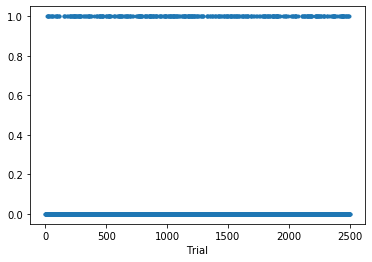

In [7]:
# チェリー=1, はずれ=0
plt.plot(x3, '.')
plt.xlabel('Trial')
plt.show()

各設定ωiのスロットで，ある n 回分の結果xが得られる確率 P(x|ωi) は当たり(確率 th )が r 回，はずれ(確率 1-th )が n-r 回独立に起こる確率なので

In [8]:
P_omg_x_1 = np.ones([n, len(th_x1)])  # 当たり回数から推測する設定対数尤度
P_omg_x_2 = np.ones([n, len(th_x2)])  # スイカ回数から推測する設定対数尤度
P_omg_x_3 = np.ones([n, len(th_x3)])  # チェリー回数から推測する設定対数尤度
P_x_omg_1 = np.ones([n, len(th_x1)])
P_x_omg_2 = np.ones([n, len(th_x2)])
P_x_omg_3 = np.ones([n, len(th_x3)])
P_omg_x = np.ones([n, len(pi)])  # トータルで推測する設定確率（開始前〜終了時，開始前事前分布を含むため1行多い）
for k in range(n):
    P_x_omg_1[k] = np.sum(x1[:k])*np.log(th_x1) + np.sum(1-x1[:k])*np.log(1-th_x1)
    P_x_omg_2[k] = np.sum(x2[:k])*np.log(th_x2) + np.sum(1-x2[:k])*np.log(1-th_x2)
    P_x_omg_3[k] = np.sum(x3[:k])*np.log(th_x3) + np.sum(1-x3[:k])*np.log(1-th_x3)
    if k>0:
        P_omg_x_1[k] = P_omg_x_1[k-1] + P_x_omg_1[k]
        P_omg_x_2[k] = P_omg_x_2[k-1] + P_x_omg_2[k]
        P_omg_x_3[k] = P_omg_x_3[k-1] + P_x_omg_3[k]
        P_omg_x_1[k] -= np.max(P_omg_x_1[k])
        P_omg_x_2[k] -= np.max(P_omg_x_2[k])
        P_omg_x_3[k] -= np.max(P_omg_x_3[k])
    else:
        P_omg_x_1[k] = np.log(pi) + P_x_omg_1[k]
        P_omg_x_2[k] = np.log(pi) + P_x_omg_2[k]
        P_omg_x_3[k] = np.log(pi) + P_x_omg_3[k]
    P_omg_x[k] = np.exp(P_omg_x_1[k] + P_omg_x_2[k] + P_omg_x_3[k])
    P_omg_x[k] /= np.sum(P_omg_x[k])

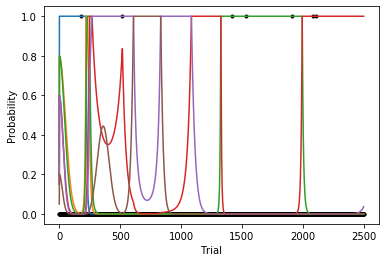

In [9]:
# 当たり判断
plt.plot(x1, '.', color='k')
plt.plot(np.exp(P_omg_x_1))
plt.xlabel('Trial')
plt.ylabel('Probability')
plt.show()

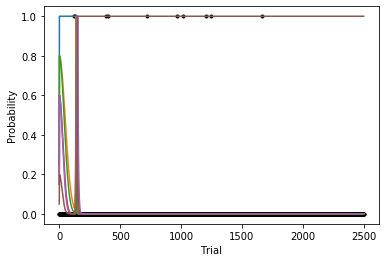

In [10]:
# スイカ判断
plt.plot(x2, '.', color='k')
plt.plot(np.exp(P_omg_x_2))
plt.xlabel('Trial')
plt.ylabel('Probability')
plt.show()

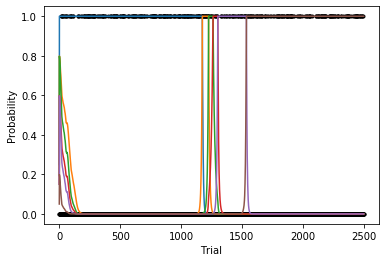

In [11]:
# チェリー判断
plt.plot(x3, '.', color='k')
plt.plot(np.exp(P_omg_x_3))
plt.xlabel('Trial')
plt.ylabel('Probability')
plt.show()

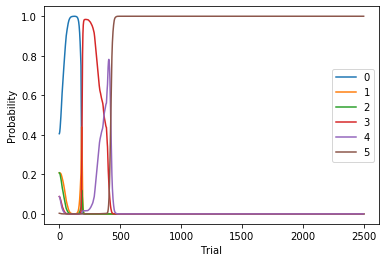

In [12]:
# 総合判断
plt.plot(P_omg_x)
plt.xlabel('Trial')
plt.ylabel('Probability')
plt.legend(range(6))
plt.show()

1つデータが得られる度に事後確率を更新して，次の事前確率に使用する「ベイズ更新」を取り入れた．1以下の確率を何乗もすると0.00000...の微小値をdouble型で表現できなくなり，アンダーフロー（桁落ち）が発生する．それを避けるために確率部分は対数で計算し，出力部分で元に戻した．試行回数を増やすとまだアンダーフローのような症状が出て動作が安定していない．
当たり確率が低いため，かなり試行回数を増やさないと正解にたどり着けない．チェリー確率が情報が多いため使いやすいが，設定間で似たような確率になっている機種は試行回数を増やしても判断が難しい．
特定の設定を否定するような情報も取り入れることはできる．
正解設定が4だとしても推定結果が5になっていれば5相当の当たりが出ているということなので結果オーライな気もする．正解を探すツールだけど，単に設定が1or2でない（負けない）ことを確認するツールとして使えばいいのかもしれない．